In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [4]:
claims = pd.read_csv("claims.csv")
cust = pd.read_csv("cust_demographics.csv")

In [5]:
cust

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [3]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


# Q1 : 360 view of data

In [6]:
full_df = pd.merge(claims, cust, how="left", left_on=["customer_id"],  right_on=["CUST_ID"])
full_df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No,NaN,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN


# Q2

In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  CUST_ID              1085 non-null   float64
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

There are some mismatched variables here such as 'claim_amount' which should be numeric (without the $)

'DateOfBirth' is also a string which should be date type

Finally, claim_id or customer_id could be string as well, but this does not matter much.

# Q3

In [24]:
full_df["claim_amount"] = np.where(full_df["claim_amount"].str.find('$')> -1, full_df["claim_amount"].str [1:], full_df["claim_amount"])
full_df["claim_amount"] = pd.to_numeric(full_df["claim_amount"] )

In [26]:
full_df["claim_amount"]

0        2980.0
1        2980.0
2        3369.5
3        1680.0
4        2680.0
         ...   
1095     3059.0
1096     1520.0
1097    23575.0
1098    25120.0
1099    36685.0
Name: claim_amount, Length: 1100, dtype: float64

# Q4

In [37]:
flaglist=[]
for i in range(0, len(full_df)):
    if (full_df["claim_type"][i] == "Injury only" and full_df["police_report"][i] == "Yes" ):
        flaglist.append(1)
    else:
        flaglist.append(0)
full_df["Injury claim and reported?"] = pd.Series(flaglist)

In [42]:
full_df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Injury claim and reported?
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,0
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,1520.0,2.0,No,NaN,NaN,NaN,NaN,NaN,NaN,0
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,0
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN,0


# Q5

In [45]:
full_df.groupby('customer_id').claim_id.agg(['count']).value_counts()

count
1        1086
2           7
dtype: int64

There are 7 customers with duplicated records

In [48]:
q5 = full_df.groupby('customer_id').claim_id.agg(['count'])
q5[q5['count']>1]

,count
customer_id,
19269962,2
21831191,2
30308357,2
47830476,2
53539195,2
84147585,2
85357756,2


In [54]:
most_recent_only = full_df.drop_duplicates(subset='customer_id', keep = "last")

In [55]:
most_recent_only

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Injury claim and reported?
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,0
6,12878692,18401412,Driver error,01/13/2018,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,02-Mar-99,AR,752-398-2914,Gold,0
7,27026412,73486606,Natural causes,04/10/2018,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,25-Oct-99,AK,256-968-9172,Silver,0
8,43908336,32813689,Crime,02/15/2018,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,12-Oct-93,ID,142-324-7481,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,0
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,1520.0,2.0,No,NaN,NaN,NaN,NaN,NaN,NaN,0
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,0
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN,0


 Now this dataset has only latest record for each customer

In [56]:
np.sum(most_recent_only.isnull())

claim_id                       0
customer_id                    0
incident_cause                 0
claim_date                     0
claim_area                     0
police_report                  0
claim_type                     0
claim_amount                  65
total_policy_claims           10
fraudulent                     0
CUST_ID                       15
gender                        15
DateOfBirth                   15
State                         15
Contact                       15
Segment                       15
Injury claim and reported?     0
dtype: int64

Plan: Mean value imputation for claim_amount

Modal value imputation for total_policy_claims, gender, DOB, state, segment 
      
CUST_ID can be deleted, contact number can be deleted

In [64]:
most_recent_only = most_recent_only.drop(['CUST_ID'], axis=1)

In [70]:
most_recent_only.claim_amount = most_recent_only.claim_amount.fillna(most_recent_only.claim_amount.mean())

In [91]:
most_recent_only.total_policy_claims = most_recent_only.total_policy_claims.fillna(most_recent_only.total_policy_claims.mode()[0])
most_recent_only.gender = most_recent_only.gender.fillna(most_recent_only.gender.mode()[0])
most_recent_only.State = most_recent_only.State.fillna(most_recent_only.State.mode()[0])
most_recent_only.Segment = most_recent_only.Segment.fillna(most_recent_only.Segment.mode()[0])
most_recent_only.DateOfBirth = most_recent_only.DateOfBirth.fillna(most_recent_only.DateOfBirth.mode()[0])

In [92]:
np.sum(most_recent_only.isnull())

claim_id                       0
customer_id                    0
incident_cause                 0
claim_date                     0
claim_area                     0
police_report                  0
claim_type                     0
claim_amount                   0
total_policy_claims            0
fraudulent                     0
gender                         0
DateOfBirth                    0
State                          0
Contact                       15
Segment                        0
Injury claim and reported?     0
dtype: int64

The imputation is now complete.

# Q7

In [93]:
newdates =[]
for i in most_recent_only['DateOfBirth']:
        newdates.append(pd.to_datetime(i, format= "%d-%b-%y")) 
most_recent_only['DateOfBirth'] = pd.Series(newdates) 

In [225]:
today_date = dt.datetime.today()
no_of_days = today_date - most_recent_only['DateOfBirth']
age_days = no_of_days.dt.days
age_yrs = age_days / 365.25
most_recent_only['Age_in_Yrs'] = age_yrs

In [226]:
most_recent_only

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Injury claim and reported?,Age_in_Yrs,Age_category,Month_no
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,43.633128,Adult,11.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0,52.629706,Adult,10.0
6,12878692,18401412,Driver error,2018-04-24,Auto,No,Material only,1730.0,4.0,No,Male,1969-01-14,AR,752-398-2914,Gold,0,53.626283,Adult,1.0
7,27026412,73486606,Natural causes,2018-10-03,Auto,No,Material only,1160.0,3.0,No,Male,1977-07-26,AK,256-968-9172,Silver,0,45.097878,Youth,12.0
8,43908336,32813689,Crime,2018-06-03,Auto,Unknown,Material only,2620.0,1.0,No,Male,1987-03-15,ID,142-324-7481,Silver,0,35.463381,Adult,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,NaT,Auto,No,Material only,3059.0,4.0,Yes,Male,NaT,NY,NaN,Gold,0,NaN,Youth,10.0
1096,10247193,14818669,Natural causes,NaT,Auto,No,Material only,1520.0,2.0,No,Male,NaT,NY,NaN,Gold,0,NaN,Youth,10.0
1097,79807493,85322831,Other driver error,NaT,Auto,No,Material and injury,23575.0,2.0,Yes,Male,NaT,NY,NaN,Gold,0,NaN,Youth,10.0
1098,69299345,73449366,Other causes,NaT,Auto,Unknown,Material and injury,25120.0,1.0,No,Male,NaT,NY,NaN,Gold,0,NaN,Youth,10.0


In [227]:
most_recent_only.Age_in_Yrs = most_recent_only.Age_in_Yrs.fillna(most_recent_only.Age_in_Yrs.mean())

In [228]:
most_recent_only.DateOfBirth = most_recent_only.DateOfBirth.fillna(most_recent_only.DateOfBirth.mean())


In [229]:
current_year = dt.date.today().year
most_recent_only.DateOfBirth = pd.Series(np.where(most_recent_only.DateOfBirth.dt.year > current_year,
                   most_recent_only.DateOfBirth - pd.DateOffset(years=100),
                   most_recent_only.DateOfBirth))


In [230]:
most_recent_only["Age_category"] = pd.cut(most_recent_only.Age_in_Yrs, bins=[0,18,30,60,100],
       labels=['Children', 'Youth', 'Adult','Senior'])

In [231]:
most_recent_only

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Injury claim and reported?,Age_in_Yrs,Age_category,Month_no
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,43.633128,Adult,11.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0,52.629706,Adult,10.0
6,12878692,18401412,Driver error,2018-04-24,Auto,No,Material only,1730.0,4.0,No,Male,1965-08-13,AR,752-398-2914,Gold,0,53.626283,Adult,1.0
7,27026412,73486606,Natural causes,2018-10-03,Auto,No,Material only,1160.0,3.0,No,Male,1979-10-10,AK,256-968-9172,Silver,0,45.097878,Adult,12.0
8,43908336,32813689,Crime,2018-06-03,Auto,Unknown,Material only,2620.0,1.0,No,Male,1967-04-22,ID,142-324-7481,Silver,0,35.463381,Adult,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,NaT,Auto,No,Material only,3059.0,4.0,Yes,Male,NaT,NY,NaN,Gold,0,42.645313,Adult,10.0
1096,10247193,14818669,Natural causes,NaT,Auto,No,Material only,1520.0,2.0,No,Male,NaT,NY,NaN,Gold,0,42.645313,Adult,10.0
1097,79807493,85322831,Other driver error,NaT,Auto,No,Material and injury,23575.0,2.0,Yes,Male,NaT,NY,NaN,Gold,0,42.645313,Adult,10.0
1098,69299345,73449366,Other causes,NaT,Auto,Unknown,Material and injury,25120.0,1.0,No,Male,NaT,NY,NaN,Gold,0,42.645313,Adult,10.0


# Q8

In [211]:
most_recent_only.groupby('Segment').claim_amount.agg(['mean'])

,mean
Segment,
Gold,12761.649879
Platinum,12370.555376
Silver,12265.024420


# Q9

In [212]:
newdates1 =[]
for i in most_recent_only['claim_date']:
        newdates1.append(pd.to_datetime(i, format= "%m/%d/%Y"))
                         
most_recent_only['claim_date'] = pd.Series(newdates1)    

In [213]:
cutoff = pd.to_datetime("Sep 11 2018", format= "%b %d %Y")
prior_claims = most_recent_only [most_recent_only['claim_date'] < cutoff ]

# This df only has claims which are ATLEAST 20 DAYS PRIOR to the 1st october 2018

In [214]:
prior_claims.groupby('incident_cause').claim_amount.agg(['sum'])

,sum
incident_cause,
Crime,7.311743e+05
Driver error,3.209998e+06
Natural causes,1.229620e+06
Other causes,4.024120e+06
Other driver error,3.304019e+06


# Q10

In [232]:
driver_related = most_recent_only[(most_recent_only['incident_cause'] == 'Driver error') | 
                 (most_recent_only['incident_cause'] == 'Other driver error')
                 ]

In [233]:
driver_adults = driver_related[(driver_related['Age_category'] == 'Adult') ]

In [234]:
final_filter_q10 = driver_adults[
               (driver_adults['State'] == "TX") | (driver_adults['State'] == "AK") | (driver_adults['State'] == "DE")
                                  ]

In [235]:
final_filter_q10.shape

(26, 19)

There are 26 such records.

# Q11

In [219]:
pie_data = most_recent_only.groupby(by=['Segment','gender'])[['claim_amount']].sum() 

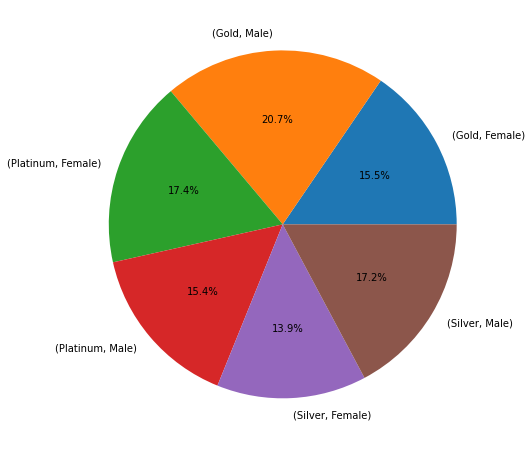

In [220]:
pie_data.plot(kind='pie',subplots=True,legend=False,autopct = "%.1f%%")
plt.ylabel("")
plt.rcParams['figure.figsize'] = [6,6]
plt.show()

# Q 12

<AxesSubplot:xlabel='gender', ylabel='claim_amount'>

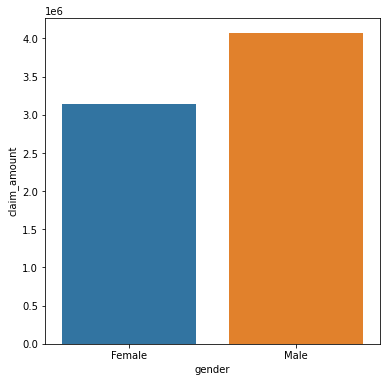

In [135]:
bar_data = driver_related.groupby(by=[ 'gender'])[['claim_amount']].sum().reset_index()
sns.barplot(x="gender",y="claim_amount",data=bar_data)

Males paid more on driver related claims

# Q13

In [236]:
fraud_bar = most_recent_only.groupby(by=['Age_category','fraudulent'])[['claim_id']].count().reset_index() 

In [237]:
fraud_bar

,Age_category,fraudulent,claim_id
0,Children,No,0
1,Children,Yes,0
2,Youth,No,168
3,Youth,Yes,49
4,Adult,No,604
5,Adult,Yes,189
6,Senior,No,69
7,Senior,Yes,14


<AxesSubplot:xlabel='Age_category', ylabel='claim_id'>

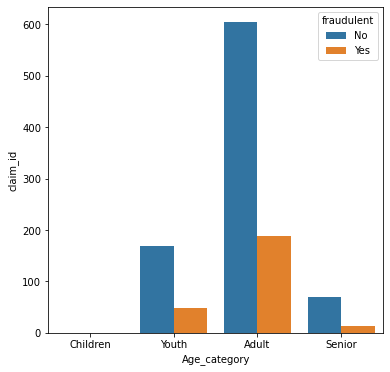

In [238]:
sns.barplot(x="Age_category", y="claim_id" ,hue = "fraudulent", data=fraud_bar)

 Adults had more fraudulent claims

# Q14

In [148]:
most_recent_only['Month_no'] = most_recent_only.claim_date.dt.month

In [150]:
most_recent_only.Month_no = most_recent_only.Month_no.fillna(most_recent_only.Month_no.mode()[0])

In [151]:
line_data = most_recent_only.groupby(by=['Month_no'])[['claim_amount']].sum().reset_index() 

In [152]:
line_data

,Month_no,claim_amount
0,1.0,1.467622e+06
1,2.0,1.200366e+06
2,3.0,1.259518e+06
3,4.0,1.091876e+06
4,5.0,1.022637e+06
5,6.0,1.528344e+06
6,7.0,1.323385e+06
7,8.0,1.057721e+06
8,9.0,1.014345e+06
9,10.0,1.692085e+06


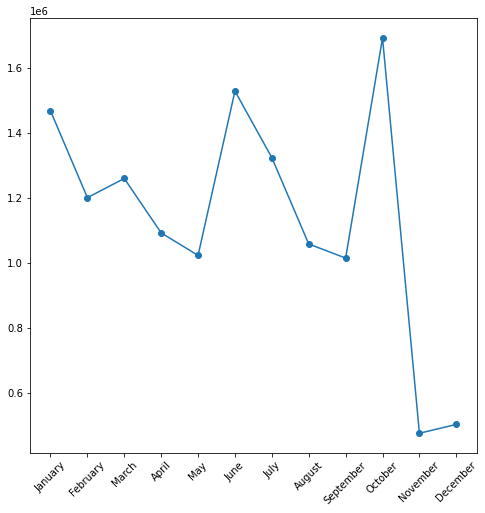

In [170]:
import calendar
monthnames = list(calendar.month_name)
monthnames = monthnames[1:13]
plt.xticks(rotation = 45)
plt.plot(monthnames, line_data["claim_amount"], marker='o')
plt.rcParams['figure.figsize'] = [8,8]

# Q15

In [244]:
gender_age = most_recent_only.groupby(by=['Age_category','gender'])[['claim_amount']].mean().reset_index()

In [245]:
gender_age

,Age_category,gender,claim_amount
0,Children,Female,NaN
1,Children,Male,NaN
2,Youth,Female,11831.937078
3,Youth,Male,12726.895156
4,Adult,Female,12288.684995
5,Adult,Male,12818.581506
6,Senior,Female,10935.592950
7,Senior,Male,13130.173292


In [247]:
gender_age["claim_amount"] = np.where(pd.isnull(gender_age["claim_amount"]), 0, gender_age["claim_amount"])

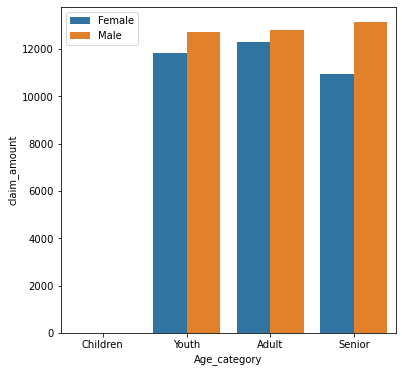

In [250]:
a = sns.barplot(x="Age_category", y="claim_amount" ,hue = "gender", data=gender_age)
plt.legend(loc = 'upper left')

In [254]:
q15 = most_recent_only.groupby(by=['Age_category','gender', 'fraudulent'])[['claim_amount']].mean().reset_index()

In [256]:
q15["claim_amount"] = np.where(pd.isnull(q15["claim_amount"]), 0, q15["claim_amount"])

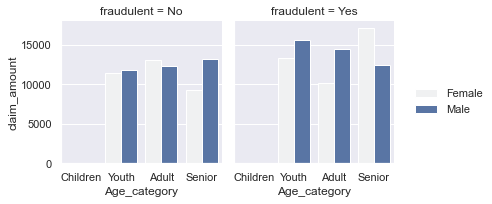

In [270]:
g = sns.FacetGrid(q15, col = "fraudulent", margin_titles=True)
g.map_dataframe(sns.barplot, x = "Age_category", y = "claim_amount", hue = "gender").add_legend()

# Hypothesis testing : test and write-up after each question


# Q16

In [278]:
import scipy.stats as stats

In [277]:
maleclaims = most_recent_only.claim_amount[most_recent_only.gender=="Male"]
femaleclaims = most_recent_only.claim_amount[most_recent_only.gender=="Female"]

In [279]:
# Assuming unequal variance
uneq_var = stats.ttest_ind(a= maleclaims, b= femaleclaims, equal_var=False) 
uneq_var

Ttest_indResult(statistic=0.8992431685919813, pvalue=0.36872192649407276)

In [280]:
# Assuming equal variance
eq_var = stats.ttest_ind(a= maleclaims, b= femaleclaims, equal_var=True) 
eq_var

Ttest_indResult(statistic=0.8982962111011336, pvalue=0.3692258511129498)

For this problem, we choose the independent 2 sample t-test.

The predictor variable is the gender here and the response variable is the claim amount.

Let the null hypothesis H0 be: all genders in our dataset have similar mean amount.

Let the alt hypothesis H1 be: M and F have different means.

Results: 
We choose p value as 0.369 and the t-value as 0.89.

As p > 0.05 we say that it is not statistically significant. We accept H_0.

Implication: The gender does not affect the average claim amount for the business.

# Q17

In [286]:
crosstab_data = pd.crosstab(most_recent_only.Segment, most_recent_only.Age_category ,margins=True)
crosstab_data

Age_category,Youth,Adult,Senior,All
Segment,,,,
Gold,81,282,23,386
Platinum,73,260,28,361
Silver,63,251,32,346
All,217,793,83,1093


In [287]:
stats.chi2_contingency (observed= crosstab_data)

(3.3921029814406536,
 0.946704089259321,
 9,
 array([[  76.63494968,  280.05306496,   29.31198536,  386.        ],
        [  71.6715462 ,  261.91491308,   27.41354071,  361.        ],
        [  68.69350412,  251.03202196,   26.27447392,  346.        ],
        [ 217.        ,  793.        ,   83.        , 1093.        ]]))

For this problem, we choose the chi square test as we have 2 categorical variables.

The variables here are the age category and the segment.

Let the null hypothesis H0 be: the observed frequencies are same as mathematically expected ones.

Let the alt hypothesis H1 be: the observed frequencies are influenced by the other variable.

Results: 
We choose p value as 0.946 (given) for the chi2 value as 3.39

As p > 0.05 we say that it is not statistically significant. We accept H_0.

Implication: The age category does not affect the segment for the business and they are not dependent on each other.

# Q 18

In [290]:
stats.ttest_1samp(a = most_recent_only.claim_amount, popmean = 10000)

Ttest_1sampResult(statistic=6.128796492991151, pvalue=1.234747924704494e-09)

In [291]:
most_recent_only.claim_amount.mean()

12475.266050583632

For this problem, we choose the t-test as we are comparing this year's mean to last year's mean.

The means of this year and last year are given to us.

Let the null hypothesis H0 be: the means are the same and no significant change is there.

Let the alt hypothesis H1 be: the means are different and significant change is there.

Results: 
We have p value as << 0.05

So we say that it is statistically significant, and the H_0 is rejected.

Implication: The claim amounts of this year are much better than last year (increase).

# Q19

In [292]:
g1 = most_recent_only.claim_amount.loc[most_recent_only.Age_category == "Children"]
g2 = most_recent_only.claim_amount.loc[most_recent_only.Age_category == "Youth"]
g3 = most_recent_only.claim_amount.loc[most_recent_only.Age_category == "Adult"]
g4 = most_recent_only.claim_amount.loc[most_recent_only.Age_category == "Senior"]

In [296]:
print (g1.mean())
print (g2.mean())
print (g3.mean())
print (g4.mean())

nan
12289.726694041494
12562.654187172775
12125.425665697812


There are no records for children so their claims are definitely different (i.e. non existent)

We will now check the other 3 groups.

In [299]:
aov = stats.f_oneway(g2, g3, g4)
aov

F_onewayResult(statistic=0.06630922886852438, pvalue=0.9358452051169283)

For this problem, we choose the ANOVA (one way) as we are comparing means of multiple age categories (over 2).

The response variable is the claim amount and predictor is age categories.

Let the null hypothesis H0 be: the means are the same across the groups.

Let the alt hypothesis H1 be: the means are not same across the groups.

Results: 
We have p value as 0.935, which is >0.05

So we say that it is not statistically significant, and the H_0 is accepted for youths, adults and seniors.

Implication: The claim amounts of youths, adults and seniors are the same on average and the children here do not have claims filed with the company.

# Q20

In [305]:
stats.pearsonr(most_recent_only.total_policy_claims , most_recent_only.claim_amount)

(-0.02439536195862129, 0.4204036549906384)

For this problem, we choose the Pearson's correlation test as we are studying the relation between 2 quantitative variables.

The response variable is the claim amount and predictor is total policy claims.

Let the null hypothesis H0 be: there is no significant correlation between the 2 variables.

Let the alt hypothesis H1 be: there is significant correlation between the 2 variables.

Results: 
We have p value as 0.42, which is >0.05

So we say that it is not statistically significant, and the H_0 is accepted.

Implication: The claim amounts and the no of policy claims are not correlated for the record-level data here.